In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data=pd.read_csv("Sales_add.csv")

In [4]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [6]:
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [7]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


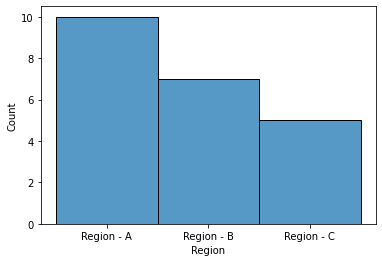

In [18]:
sns.histplot(data=data, x="Region")
plt.show()

In [13]:
data.groupby(["Manager","Region"]).sum()

Sales_before_digital_add(in $)  \
Manager     Region                                       
Manager - A Region - A                          594514   
            Region - B                          570900   
            Region - C                          147463   
Manager - B Region - A                          466851   
            Region - B                          152167   
            Region - C                          469477   
Manager - C Region - A                          420684   
            Region - B                          330598   
            Region - C                          130625   

                        Sales_After_digital_add(in $)  
Manager     Region                                     
Manager - A Region - A                        1030437  
            Region - B                         939851  
            Region - C                         229336  
Manager - B Region - A                         656832  
            Region - B                         231808  
            Region - C                         643654  
Manager - C Region - A                         701262  
            Region - B                         429436  
            Region - C                         222106

# 1) The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

H0 : There is NOT an increase in sales after stepping into digital marketing.

H1 : There is an increase in sales after stepping into digital marketing.

Let us set our Significance level 'Alpha'=5%

In [30]:
data["Sales_before_digital_add(in $)"].mean()

149239.95454545456

In [29]:
data["Sales_After_digital_add(in $)"].mean()

231123.72727272726

In [28]:
t_stat,pvalue=stats.ttest_ind(data["Sales_After_digital_add(in $)"],data["Sales_before_digital_add(in $)"],alternative='greater')
print('T statistic value is  -: ',t_stat)
print('pvalue is  -: ',pvalue)
if pvalue<.05:
    print("we reject the null hypothesis H0, and we can say that Digital marketing is effective.")
else:
    print("we Fail to reject the null hypothesis H0, and we should improve strategies for Digital marketing.")

T statistic value is  -:  12.995084451110877
pvalue is  -:  1.3071840034523225e-16
we reject the null hypothesis H0, and we can say that Digital marketing is effective.


# 2) The company needs to check whether there is any dependency between the features “Region” and “Manager”.

H0 : There is NOT any dependency between the features “Region” and “Manager”.

H1 : There is dependency between the features “Region” and “Manager”.

Let us set our Significance level 'Alpha'=5%


In [51]:
Region=data.groupby(["Region"]).mean()
Manager=data.groupby(["Manager"]).mean()

In [52]:
Region

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
Region,,
Region - A,148204.900000,238853.100000
Region - B,150523.571429,228727.857143
Region - C,149513.000000,219019.200000


In [53]:
Manager

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
Manager,,
Manager - A,145875.222222,244402.666667
Manager - B,155499.285714,218899.142857
Manager - C,146984.500000,225467.333333


In [61]:
value=stats.ttest_ind(Manager["Sales_After_digital_add(in $)"],Region["Sales_After_digital_add(in $)"])
print('T statistic value is  -: ',value[0])
print('pvalue is  -: ',value[1])
if value[1]<.05:
    print("we reject the null hypothesis H0, and we can say that there is a strong dependency b/w 'Managers' & 'Regions' in terms of Sales After digital adds.")
    
else:
    print("we Fail to reject the null hypothesis H0, and there is no dependency between 'Managers' and 'Regions' in terms of Sales After Digital marketing .")

T statistic value is  -:  0.07569167332744269
pvalue is  -:  0.943298901844539
we Fail to reject the null hypothesis H0, and there is no dependency between 'Managers' and 'Regions' in terms of Sales After Digital marketing.


In [64]:
value=stats.ttest_ind(Manager["Sales_before_digital_add(in $)"],Region["Sales_before_digital_add(in $)"])
print('T statistic value is  -: ',value[0])
print('pvalue is  -: ',value[1])
if value[1]<.05:
    print("we reject the null hypothesis H0, and we can say that there is a strong dependency b/w 'Managers' & 'Regions' in terms of Sales Before digital adds.")
    
else:
    print("we Fail to reject the null hypothesis H0, and there is no dependency between 'Managers' and 'Regions' in terms of Sales Before Digital marketing.")

T statistic value is  -:  0.012584493888729684
pvalue is  -:  0.9905619409767316
we Fail to reject the null hypothesis H0, and there is no dependency between 'Managers' and 'Regions' in terms of Sales Before Digital marketing.


For both case of 'sales' we can clearly say that 'Managers' & 'Regions' are independent